In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests as req

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | tiznit
Processing Record 4 of Set 1 | hun
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | pangnirtung
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | kang
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | marawi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | tambacounda
Processing Record 17 of Set 1 | viana
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | si

Processing Record 39 of Set 4 | lavrentiya
Processing Record 40 of Set 4 | touros
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | alekseyevka
Processing Record 43 of Set 4 | dezhou
Processing Record 44 of Set 4 | chokurdakh
Processing Record 45 of Set 4 | tezu
Processing Record 46 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | ngorongoro
Processing Record 49 of Set 4 | beidao
Processing Record 50 of Set 4 | mar del plata
Processing Record 1 of Set 5 | hamilton
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | santa cruz de la palma
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | gushikawa
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | bandarbeyla
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | kalianget
Processing Record 11 of Set 5 | paradwip
City not found.

Processing Record 26 of Set 8 | perigueux
Processing Record 27 of Set 8 | san javier
Processing Record 28 of Set 8 | northam
Processing Record 29 of Set 8 | meyungs
City not found. Skipping...
Processing Record 30 of Set 8 | mount gambier
Processing Record 31 of Set 8 | barcelos
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | caravelas
Processing Record 34 of Set 8 | faya
Processing Record 35 of Set 8 | praia
Processing Record 36 of Set 8 | oktyabrskiy
Processing Record 37 of Set 8 | san quintin
Processing Record 38 of Set 8 | carballo
Processing Record 39 of Set 8 | langsa
Processing Record 40 of Set 8 | campbell river
Processing Record 41 of Set 8 | leh
Processing Record 42 of Set 8 | lagoa
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | deputatskiy
Processing Record 45 of Set 8 | sakakah
Processing Record 46 of Set 8 | saint-francois
Processing Record 47 of Set 8 | atbasar
Processing Record 48 of Set 8 | turukhansk
Processing Record

Processing Record 12 of Set 12 | roblin
Processing Record 13 of Set 12 | temaraia
City not found. Skipping...
Processing Record 14 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 12 | iskateley
Processing Record 16 of Set 12 | safwah
City not found. Skipping...
Processing Record 17 of Set 12 | nicolas bravo
Processing Record 18 of Set 12 | flinders
Processing Record 19 of Set 12 | khudumelapye
Processing Record 20 of Set 12 | curup
Processing Record 21 of Set 12 | roald
Processing Record 22 of Set 12 | hofn
Processing Record 23 of Set 12 | malanje
Processing Record 24 of Set 12 | solwezi
Processing Record 25 of Set 12 | codrington
Processing Record 26 of Set 12 | tura
Processing Record 27 of Set 12 | thomaston
Processing Record 28 of Set 12 | road town
Processing Record 29 of Set 12 | ginda
Processing Record 30 of Set 12 | tazovskiy
Processing Record 31 of Set 12 | madang
Processing Record 32 of Set 12 | leopoldina
Processing Record 33 of Set 12 | tabou

In [19]:
len(city_data)

571

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,34.70,93,100,3.56,RU,2021-05-23 16:49:01
1,Tiznit,29.5833,-9.5000,70.21,46,81,9.48,MA,2021-05-23 16:49:01
2,Hun,29.1268,15.9477,99.84,11,0,17.52,LY,2021-05-23 16:49:01
3,Hilo,19.7297,-155.0900,84.27,90,40,4.61,US,2021-05-23 16:45:59
4,Hithadhoo,-0.6000,73.0833,84.33,72,86,9.93,MV,2021-05-23 16:49:02
5,Pangnirtung,66.1451,-65.7125,26.60,68,75,13.80,CA,2021-05-23 16:49:02
6,Rikitea,-23.1203,-134.9692,74.32,71,84,8.39,PF,2021-05-23 16:49:02
7,Castro,-24.7911,-50.0119,65.71,49,6,13.38,BR,2021-05-23 16:49:03
8,Kang,-23.6752,22.7876,60.98,38,3,6.58,BW,2021-05-23 16:49:03
9,Saskylakh,71.9167,114.0833,37.44,86,100,16.71,RU,2021-05-23 16:49:03


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2021-05-23 16:49:01,71.9667,102.5000,34.70,93,100,3.56
1,Tiznit,MA,2021-05-23 16:49:01,29.5833,-9.5000,70.21,46,81,9.48
2,Hun,LY,2021-05-23 16:49:01,29.1268,15.9477,99.84,11,0,17.52
3,Hilo,US,2021-05-23 16:45:59,19.7297,-155.0900,84.27,90,40,4.61
4,Hithadhoo,MV,2021-05-23 16:49:02,-0.6000,73.0833,84.33,72,86,9.93
5,Pangnirtung,CA,2021-05-23 16:49:02,66.1451,-65.7125,26.60,68,75,13.80
6,Rikitea,PF,2021-05-23 16:49:02,-23.1203,-134.9692,74.32,71,84,8.39
7,Castro,BR,2021-05-23 16:49:03,-24.7911,-50.0119,65.71,49,6,13.38
8,Kang,BW,2021-05-23 16:49:03,-23.6752,22.7876,60.98,38,3,6.58
9,Saskylakh,RU,2021-05-23 16:49:03,71.9167,114.0833,37.44,86,100,16.71


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

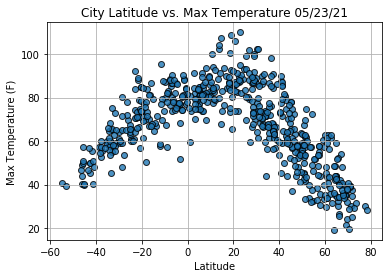

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

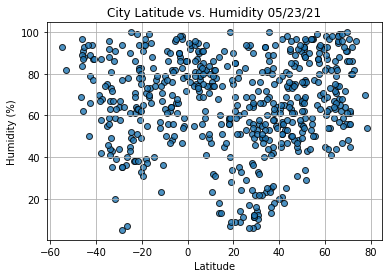

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

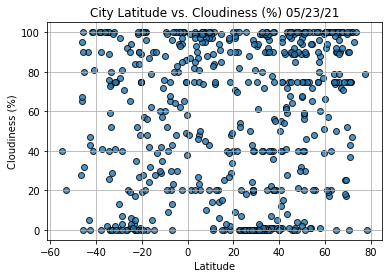

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

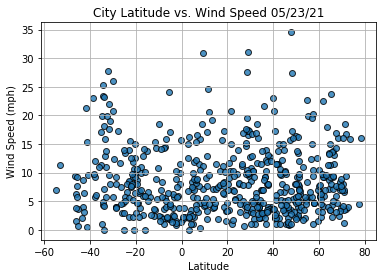

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()